<a href="https://colab.research.google.com/github/O-Kpy/Dacon/blob/main/Dacon_%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from tqdm import tqdm

In [10]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [130]:
import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [131]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_sample_submission.csv')
info = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_age_gender_info.csv')
train.shape, test.shape, info.shape

((2952, 15), (1022, 14), (16, 23))

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [4]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [132]:
# train set과 test set 합쳐서 전처리
data = pd.concat([train, test], axis=0)

In [153]:
# null값 체크
pd.DataFrame(data.isnull().mean()).rename(columns={0:'percent'}).sort_values('percent', ascending=False)*100

,percent
등록차량수,25.717162
단지코드,0.000000
총세대수,0.000000
임대건물구분,0.000000
지역,0.000000
공급유형,0.000000
전용면적,0.000000
전용면적별세대수,0.000000
공가수,0.000000
자격유형,0.000000


In [78]:
# null값 처리
data.loc[data['임대보증금'].isnull()]['자격유형'].unique()
# 임대보증금 null값들의 자격유형은 다 'D'이네...

array(['D'], dtype=object)

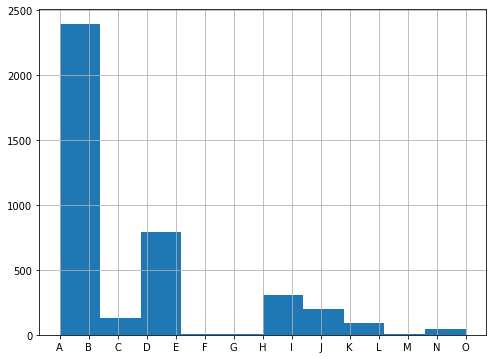

In [96]:
# 자격유형에 대해서 EDA해보자
data['자격유형'].hist(figsize=(8,6))
# A가 가장 많고, dehijcdklno순

In [85]:
data.loc[data['임대보증금'].isnull()]['지역'].unique()
# 서울 빼고 모든 지방이 포함되네

array(['강원도', '충청남도', '경상남도', '대전광역시', '부산광역시', '제주특별자치도', '울산광역시'],
      dtype=object)

In [133]:
data.loc[data['임대보증금']=='-']
# 이것을 어떻게 처리할지 고민...

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [89]:
data.loc[data['자격유형'] == 'D']
# 전용면적별세대수를 보면 D유형은 다 1세대 이다.
# 분양해서 들어온것으로 추측할 수 있다.(0으로 치환)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN


In [134]:
data['임대보증금'] = data['임대보증금'].fillna(0)
data['임대료'] = data['임대료'].fillna(0)
data['임대보증금'] = data['임대보증금'].replace({'-':0})
data['임대료'] = data['임대료'].replace({'-':0})

In [135]:
data['임대보증금'] = data['임대보증금'].astype('int')
data['임대료'] = data['임대료'].astype('int')

In [110]:
data.loc[data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]
# 지하철 null값을 처리하기 위해 지역을 EDA해보자

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,C1318,312,아파트,충청남도,공공임대(50년),49.99,159,1.0,A,18269000,258880,NaN,11.0,226.0,NaN
891,C1327,98,아파트,대전광역시,행복주택,16.83,30,13.0,J,18800000,94000,NaN,17.0,98.0,NaN
892,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,NaN
893,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,NaN


In [107]:
data.loc[data['지역']=='충청남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 충남의 지하철역 수는 0이다. ==> 충남 지하철=0으로 처리

array([nan,  0.])

In [108]:
data.loc[data['지역']=='대전광역시']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 대전광역시는 지하철이 있으니 단지코드별 비교를 통해 null값 처리

array([ 1.,  0., nan,  2.])

In [109]:
data.loc[data['지역']=='경상남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 경상남도도 지하철이 있다고 하니 단지코드별 비교를 통해 처리

array([ 0., nan,  1.])

In [124]:
data.groupby(['지역','단지코드'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False).loc['경상남도'].sort_index()
# 단지마다 지하철역 수가 결측치가 관측된다. ==> 단지별 비교는 안될 것 같다.

단지코드   도보 10분거리 내 지하철역 수(환승노선 수 반영)
C1003  0.0                              8
C1027  0.0                              5
C1077  0.0                              3
C1141  0.0                              6
C1147  0.0                              7
                                       ..
C2571  0.0                             14
C2576  0.0                              2
C2595  0.0                              5
C2631  0.0                              7
C2680  0.0                              3
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), Length: 69, dtype: int64

In [136]:
data.loc[(data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull())&(data['지역']=='충청남도'), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 0.
data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0.)

In [137]:
# 도보 10분거리 내 버스정류장 수 null값 처리
data.loc[data['단지코드']=='C1649']
# 단지코드 'C1649'는 아예 정류장 수가 결측되었다. ==> 경상남도의 median으로 처리하자

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0


In [139]:
data.loc[data['도보 10분거리 내 버스정류장 수'].isnull(), '도보 10분거리 내 버스정류장 수'] = data.loc[(data['지역']=='경상남도')]['도보 10분거리 내 버스정류장 수'].median()

In [141]:
# 자격유형 null값 처리
data.loc[data['자격유형'].isnull()]
# 자격유형을 임대보증금과 비교하여 처리

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,NaN
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,NaN


In [152]:
data.loc[(data['자격유형'].isnull())&(data['지역']=='경상남도'), '자격유형'] = 'E'
data.loc[(data['자격유형'].isnull())&(data['지역']=='강원도'), '자격유형'] = 'F'

In [159]:
data['공실율'] = data['공가수']/data['총세대수']*100

In [160]:
data.skew()
# 다 log변환을 해야한다. 그 전에 모델링 돌려보자

총세대수                             1.268751
전용면적                            10.864622
전용면적별세대수                         3.321005
공가수                              0.810131
임대보증금                            2.845083
임대료                              1.637468
도보 10분거리 내 지하철역 수(환승노선 수 반영)     2.868214
도보 10분거리 내 버스정류장 수               5.991318
단지내주차면수                          0.945232
등록차량수                            1.461736
공실율                              2.519258
dtype: float64

In [208]:
train = data.loc[data['등록차량수'].notnull()]
test = data.loc[data['등록차량수'].isnull()].drop(columns='등록차량수')

In [209]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5


idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [210]:
columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

new_train = pd.DataFrame()
new_test = pd.DataFrame()

for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:08, 48.45it/s]
150it [00:03, 49.72it/s]


In [211]:
new_train['공실율'] = new_train['공가수']/new_train['총세대수']*100
new_test['공실율'] = new_test['공가수']/new_test['총세대수']*100

In [213]:
x_train = new_train.drop(columns=['단지코드', '등록차량수'])
y_train = new_train['등록차량수']
x_test = new_test.drop(columns=['단지코드'])

In [166]:
x_train = data.loc[data['등록차량수'].notnull()].drop(columns=['등록차량수', '단지코드'])
y_train = data.loc[data['등록차량수'].notnull()]['등록차량수']
x_test = data.loc[data['등록차량수'].isnull()].drop(columns=['등록차량수', '단지코드'])
x_train.shape, y_train.shape, x_test.shape

((2952, 14), (2952,), (1022, 14))

In [162]:
pip install catboost

     |████████████████████████████████| 69.2MB 56kB/s 


In [163]:
import catboost
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error
import lightgbm

In [214]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds_test_cat = np.zeros((len(x_test)))
cat_features = x_train.select_dtypes('object').columns

for i,(train_index, valid_index) in enumerate(skf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(learning_rate=0.05, loss_function='MAE', eval_metric='MAE', n_estimators=3000, cat_features=cat_features)
  model_cat.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=70)

  preds_test_cat = model_cat.predict(x_test)

0:	learn: 281.8070995	test: 281.8070995	test1: 278.0652930	best: 278.0652930 (0)	total: 2.93ms	remaining: 8.8s
100:	learn: 85.6837069	test: 88.4277968	test1: 129.6106666	best: 129.6106666 (100)	total: 274ms	remaining: 7.85s
200:	learn: 56.0789389	test: 61.6666661	test1: 122.0217591	best: 121.8879232 (194)	total: 562ms	remaining: 7.83s
300:	learn: 43.4603404	test: 51.2377711	test1: 121.8330418	best: 121.5182440 (246)	total: 836ms	remaining: 7.49s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 121.518244
bestIteration = 246

Shrink model to first 247 iterations.
0:	learn: 285.2332829	test: 285.2332829	test1: 256.9470577	best: 256.9470577 (0)	total: 3ms	remaining: 9.01s
100:	learn: 83.8858891	test: 87.8403185	test1: 133.2952740	best: 133.2952740 (100)	total: 268ms	remaining: 7.69s
200:	learn: 54.3545177	test: 61.0050938	test1: 127.5386078	best: 127.4729384 (198)	total: 562ms	remaining: 7.82s
300:	learn: 41.8682649	test: 49.7768827	test1: 126.2394941	best: 125.2596499 (2

In [216]:
submit['num'] = preds_test_cat
submit.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/submit_2.csv', index=False)
submit

,code,num
0,C1072,744.649859
1,C1128,1132.377100
2,C1456,578.510472
3,C1840,529.667671
4,C1332,1108.137182
...,...,...
145,C2456,244.709720
146,C1266,468.808939
147,C2152,31.877588
148,C1267,422.515462


In [204]:
preds_test_cat

array([ 656.96828125, 1204.36598134,  549.12266658,  573.53921714,
       1118.59446019, 1452.28785685, 1017.04987089,  448.81413353,
        364.46579432,  295.29365802,  459.837124  ,  305.16476203,
        500.59863653,  283.25731632,  318.39479756,  200.62924896,
        494.23162373,  320.7190217 ,  206.73341431,  679.98070258,
        243.32922367,  462.26115917,  522.48043947,  499.69065665,
        352.6194336 ,  117.93191452,  134.91031467,  552.9235553 ,
        421.04499937,  524.19763751, 1029.4470471 ,  135.38098789,
        520.95008195,  255.26074126,  108.35885579,  290.36243516,
        446.59232069,  541.93354306,  743.42514103,  322.26037368,
        490.90333422,  459.27030016,  439.36898014,  551.26244307,
        841.98690666, 1103.24107785,  510.25121498,  532.52288303,
        348.04298476,  420.11891462,  742.32373143,  289.83247643,
       1036.34918844,  640.35705838,  623.34309907,  234.01726629,
        665.7504867 ,  299.42034764,  462.35500142,  155.32215

In [179]:
submit

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0
